# Installation of Ultralytics and wandb login


In [1]:
%%capture
%%bash
mkdir -p datasets

In [2]:
%%capture
%%bash
unzip /content/datasets/highlighters_earbuds_detection.v1i.yolov8.zip -d datasets/

In [3]:
%%capture
!pip install ultralytics
!pip install wandb -qU

In [4]:
# Log in to W&B
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Training Base Model

In [5]:
# Import necessary libraries
from ultralytics import YOLO
from ultralytics import settings
import os
from PIL import Image, ImageEnhance
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
from ultralytics import settings

settings.update({"wandb": True})

In [7]:
# ensure GPU is enabled

import torch
print(torch.cuda.is_available())


False


In [ ]:
model = YOLO("yolov8s.pt")  # Load a pre-trained YOLO model
result = model.train(data="datasets/data.yaml",
                     epochs=30,
                     save_period=1,
                     batch=16,
                     device=0,
                     project='highlighters_earbuds_detection',
                     plots=True)

100%|██████████| 21.5M/21.5M [00:00<00:00, 198MB/s]


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=datasets/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=highlighters_earbuds_detection, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 45.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

wandb: Currently logged in as: raufbagharib (raufbagharib-national-university-of-singapore). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 164MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 86 images, 0 backgrounds, 0 corrupt: 100%|██████████| 86/86 [00:00<00:00, 1838.15it/s]

train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 415.63it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to highlighters_earbuds_detection/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to highlighters_earbuds_detection/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.01G      1.997      4.294      1.766         12        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]

                   all         24        119      0.233      0.179      0.137     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.95G      1.729      3.131      1.685         17        640: 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         24        119      0.432       0.56      0.463      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.01G      1.616      2.453      1.582         20        640: 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         24        119      0.384      0.577       0.43      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.06G      1.489      2.006      1.436         26        640: 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         24        119      0.511       0.49      0.528      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.09G      1.391      2.009      1.378         32        640: 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         24        119      0.504      0.556      0.579      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.09G      1.473      1.689      1.426         23        640: 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         24        119      0.475      0.426      0.412      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.06G       1.45      1.677      1.407         32        640: 100%|██████████| 6/6 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         24        119      0.424      0.383      0.295      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.06G      1.473      1.669      1.422         44        640: 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         24        119      0.296      0.393      0.229      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.08G      1.427        1.7      1.428         23        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         24        119      0.365      0.361      0.231      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.98G      1.437      1.577      1.445         18        640: 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         24        119      0.244      0.295      0.212     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.02G      1.333      1.523      1.336         26        640: 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         24        119      0.387      0.463      0.327      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.02G      1.429       1.53      1.449         19        640: 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         24        119      0.471      0.386      0.355      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.02G      1.463      1.534      1.439         41        640: 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         24        119      0.507       0.48      0.428       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.05G      1.489      1.346      1.453         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         24        119      0.465      0.487      0.383      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.06G      1.361      1.341      1.424         19        640: 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         24        119      0.438      0.555      0.463      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.08G      1.364      1.393      1.378         33        640: 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         24        119       0.49      0.623       0.55       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.99G      1.314      1.312      1.359         30        640: 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         24        119      0.496      0.588        0.5      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         4G      1.318      1.203      1.341         16        640: 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         24        119      0.408      0.598      0.435      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.05G      1.286      1.138      1.359         19        640: 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         24        119      0.362      0.621      0.439      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.06G      1.249      1.116      1.349         18        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         24        119       0.55      0.482       0.51      0.224


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.02G      1.219       1.08      1.311         14        640: 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         24        119      0.481      0.641      0.569      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.89G      1.209     0.9643      1.256          9        640: 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         24        119      0.547      0.593      0.567       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.01G      1.155     0.9029      1.291          9        640: 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         24        119      0.603      0.623      0.578      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         4G      1.197     0.9474      1.288         12        640: 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         24        119      0.593      0.616      0.581      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.02G      1.108     0.9014      1.306         23        640: 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         24        119      0.563      0.653      0.611      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.84G      1.132     0.8974      1.292         13        640: 100%|██████████| 6/6 [00:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         24        119      0.624      0.611      0.631      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         4G      1.197     0.8901      1.256         21        640: 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         24        119      0.622      0.607      0.632      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.05G      1.091     0.8309      1.199          7        640: 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         24        119        0.6      0.682      0.653      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.04G      1.078     0.8113      1.292         18        640: 100%|██████████| 6/6 [00:01<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         24        119      0.537      0.765      0.656      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.04G      1.078     0.8414      1.225         10        640: 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         24        119      0.559      0.746       0.65      0.303



30 epochs completed in 0.030 hours.
Optimizer stripped from highlighters_earbuds_detection/train/weights/last.pt, 22.5MB
Optimizer stripped from highlighters_earbuds_detection/train/weights/best.pt, 22.5MB

Validating highlighters_earbuds_detection/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


                   all         24        119      0.539      0.762      0.658      0.307
                Earbud         10         61      0.598      0.731      0.655      0.328
           Highlighter         14         58      0.479      0.793      0.661      0.286
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to highlighters_earbuds_detection/train


lr/pg0,▁▂▃▄▄▅▆▆▇▇▇██████▇▇▆▆▅▅▄▄▃▃▂▂▁
lr/pg1,▁▂▃▄▄▅▆▆▇▇▇██████▇▇▆▆▅▅▄▄▃▃▂▂▁
lr/pg2,▁▂▃▄▄▅▆▆▇▇▇██████▇▇▆▆▅▅▄▄▃▃▂▂▁
metrics/mAP50(B),▁▅▅▆▇▅▃▂▂▂▄▄▅▄▅▇▆▅▅▆▇▇▇▇▇█████
metrics/mAP50-95(B),▁▅▅▇█▅▃▂▂▂▄▄▅▅▆▇▆▅▅▅▇▇▇▇██████
metrics/precision(B),▁▅▄▆▆▅▄▂▃▁▄▅▆▅▅▆▆▄▃▇▅▇█▇▇███▆▆
metrics/recall(B),▁▆▆▅▆▄▃▄▃▂▄▃▅▅▅▆▆▆▆▅▇▆▆▆▇▆▆▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▅▄▃▄▄▄▄▄▃▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▂▁▁▁


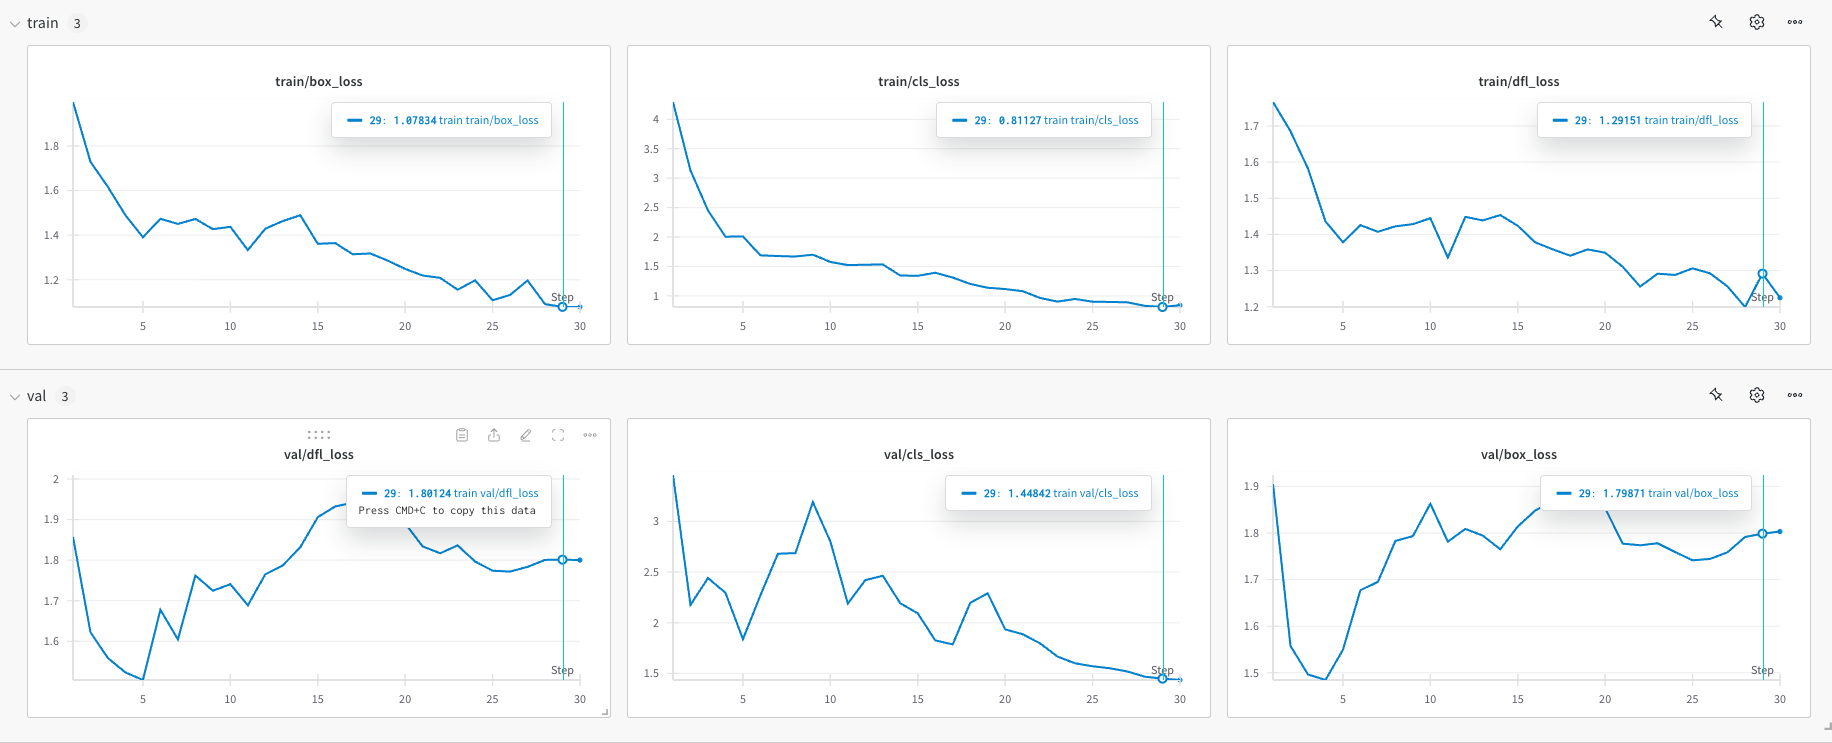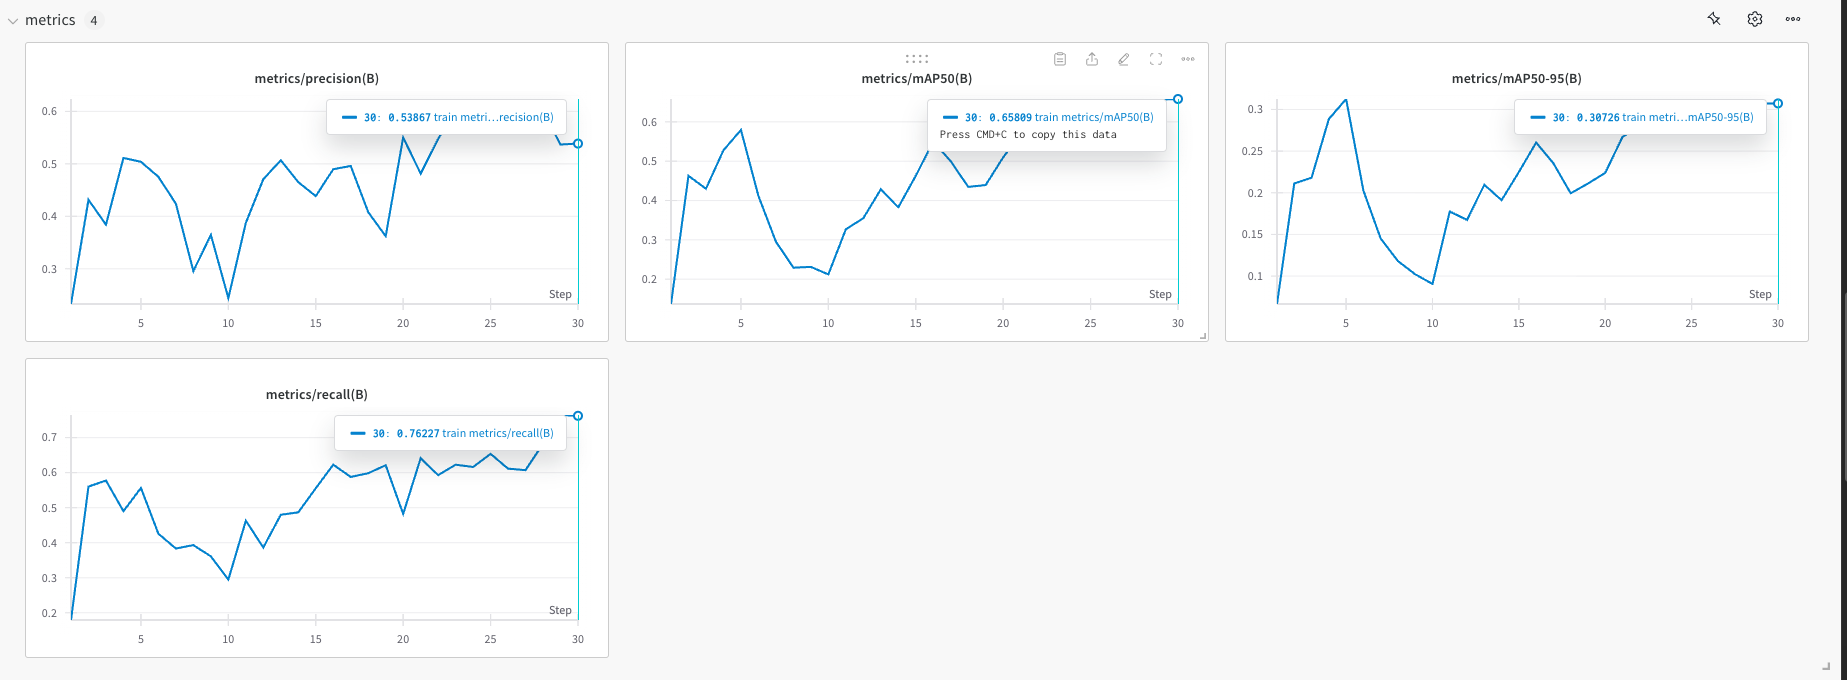

It seems from the base model when run with the annotated earbuds and highlighters, it achieved around 0.65 for mAP50 and 0.3 for mAP50-95.

mAP50 (0.65): Demonstrates the model performs reasonably well for identifying objects with moderate IoU thresholds.
mAP50-95 (0.30): Indicates the model struggles with stricter detection requirements and can benefit from optimization.


In [ ]:
from ultralytics import YOLO

model = YOLO("highlighters_earbuds_detection/train/weights/best.pt")
validation_results = model.val(data="datasets/data.yaml", device="0")

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/datasets/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]


                   all         24        119      0.586      0.657      0.655      0.304
                Earbud         10         61      0.617      0.607      0.654      0.324
           Highlighter         14         58      0.556      0.707      0.657      0.284
Speed: 0.4ms preprocess, 20.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val


# Improving Model


Data Augmentation And Resizing

In [8]:
# Step 1: Preprocessing (Resizing and Augmentation)
def preprocess_images(image_dir, output_dir, img_size=(640, 640)):
    os.makedirs(output_dir, exist_ok=True)
    for img_file in os.listdir(image_dir):
        if img_file.endswith((".jpg", ".png", ".webp")):
            # Open image
            img = Image.open(os.path.join(image_dir, img_file))

            # Resize image
            img = img.resize(img_size)

            # Data Augmentation
            if random.random() > 0.5:  # Random horizontal flip
                img = img.transpose(Image.FLIP_LEFT_RIGHT)
            if random.random() > 0.5:  # Random brightness adjustment
                enhancer = ImageEnhance.Brightness(img)
                img = enhancer.enhance(random.uniform(0.7, 1.3))

            # Save preprocessed image
            img.save(os.path.join(output_dir, img_file))

In [ ]:
# Step 4: Preprocess training and validation images
train_img_dir = '/content/datasets/train/images'
valid_img_dir = '/content/datasets/valid/images'

# Output directories for preprocessed images
train_output_dir = '/content/datasets/train/preprocessed'
valid_output_dir = '/content/datasets/valid/preprocessed'

# Preprocess the images
preprocess_images(train_img_dir, train_output_dir)
preprocess_images(valid_img_dir, valid_output_dir)

In [ ]:
# Log in to W&B
import wandb
wandb.login()

from ultralytics import settings

settings.update({"wandb": True})

True

In [10]:
# Augmentation settings to be added directly into the 'data.yaml' file
augmentation_yaml = """
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Earbud', 'Highlighter']

roboflow:
  workspace: yolov8-dataset-41ml5
  project: highlighters_earbuds_detection
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/yolov8-dataset-41ml5/highlighters_earbuds_detection/dataset/1

# Augmentation settings for training
augmentations:
  flipud: 0.5  # Flip images vertically with 50% probability
  fliplr: 0.5  # Flip images horizontally with 50% probability
  hsv_h: 0.1   # Random hue adjustment
  hsv_s: 0.7   # Random saturation adjustment
  hsv_v: 0.4   # Random brightness adjustment
  rotate: 10    # Rotate images randomly up to 10 degrees
  scale: 0.5    # Scale images between 50% and 150%
  translate: 0.2 # Translate images randomly up to 20% of image size
  shear: 0.0    # Optional shear transformation
  perspective: 0.0 # Optional perspective distortion
  flip: 0.5      # Apply flip augmentation with 50% probability
  mosaic: 0.5    # Mosaic augmentation
  mixup: 0.1     # Mixup augmentation for blending images
"""

# Save the augmentation settings directly into the data.yaml file
data_yaml_path = "datasets/data.yaml"
with open(data_yaml_path, "w") as f:
    f.write(augmentation_yaml)


In [ ]:
model = YOLO("yolov8s.pt")  # Load a pre-trained YOLO model
result = model.train(data="datasets/data.yaml",
                     epochs=30,
                     save_period=1,
                     batch=16,
                     ##device=0,
                     project='highlighters_earbuds_detection',
                     plots=True,
                     imgsz=640 # Resizing of images to 640x640
)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=datasets/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=highlighters_earbuds_detection, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/datasets/train/labels.cache... 86 images, 0 backgrounds, 0 corrupt: 100%|██████████| 86/86 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]


Plotting labels to highlighters_earbuds_detection/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to highlighters_earbuds_detection/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Step 6: Evaluate the model
model = YOLO("highlighters_earbuds_detection/train/weights/best.pt")
validation_results = model.val(data="datasets/data.yaml", device="0")